In [2]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
erk.bond_price(5,100,0.05,12,0.03)

0    109.275393
dtype: float64

In [7]:
rates, zc_prices = erk.cir(10,500,b=0.03,r_0=.03)

In [8]:
erk.bond_price(5,100,0.05,12,rates.iloc[0][[1,2,3]]) #the begining rates are the same

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [9]:
erk.bond_price(5,100,0.05,12,rates.iloc[1][[1,2,3]]) #when t = 1, rates are diverging

1    110.485157
2    109.985091
3    109.744843
dtype: float64

(0.0, 120.0, 95.66897793137424, 127.4915473386423)

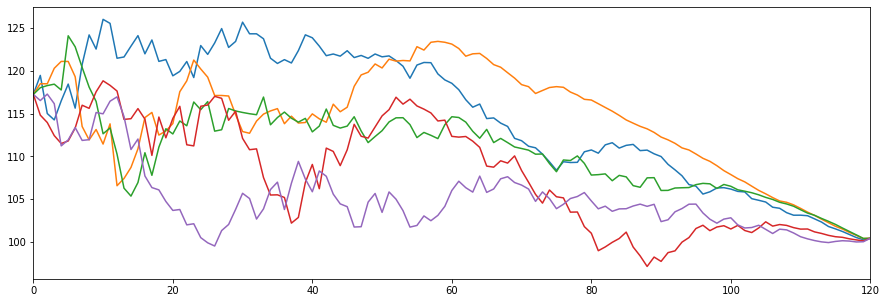

In [25]:
bond_price_plot = erk.bond_price(10,100,0.05,12,rates[[1,2,3,4,5]]).plot(legend=False, figsize=(15,5))
bond_price_plot.axis(xmin=0)
bond_price_plot.axis(xmax=120)

In [24]:
prices = erk.bond_price(10,100,0.05,12,rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,119.481,118.509,118.044,114.83,116.538
2,115.018,118.501,118.291,113.967,117.294
3,114.272,120.315,118.457,112.434,116.173
4,116.505,121.121,117.775,111.511,111.231
...,...,...,...,...,...
116,101.209,101.496,101.617,100.525,100.127
117,100.856,101.095,101.211,100.35,100.087
118,100.498,100.752,100.808,100.223,99.9832
119,100.246,100.379,100.395,100.106,100.007


In [27]:
# Returns
br = prices.pct_change().dropna()
erk.annualized_rets(br,12) #all negative because it is only including the price return and not including coupon return

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [28]:
p = erk.bond_price(10,100,.05,12,rates[[1,2,3,4]])
btr = erk.bond_total_return(p,100,0.05,12)
erk.annualized_rets(btr,12)

1    0.028576
2    0.028737
3    0.030149
4    0.031420
dtype: float64

In [34]:
price_10 = erk.bond_price(10,100,0.05,12,rates)
price_10[[1,2,3]].tail()

,1,2,3
116,101.209,101.496,101.617
117,100.856,101.095,101.211
118,100.498,100.752,100.808
119,100.246,100.379,100.395
120,100.417,100.417,100.417


In [35]:
price_30 = erk.bond_price(30,100,0.05,12,rates)
price_30[[1,2,3]].tail()  #Maturity of 30 years exceeding our 10 years period; 

,1,2,3
116,164.587,186.804,197.226
117,159.491,183.412,196.582
118,149.617,186.697,196.227
119,148.794,187.339,192.913
120,148.626,185.709,194.489


In [36]:
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)
rets_bonds = .6*rets_10 + .4*rets_30 #Weights are constant in this calc as we are assuming rebalance to 60/40 each period

In [37]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.035906,0.003681,0.088006,3.058488,-0.001232,-0.000815,1.561657,0.0


In [38]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [40]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [41]:
rets_bonds.shape

(120, 500)

In [42]:
rets = .7*rets_eq + .3*rets_bonds
rets_mean = rets.mean(axis=1) #(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.061319,0.004395,-0.427656,3.198924,-0.00275,-0.001984,6.935,0.0
